In [1]:
# Using scikit learn, evaluate the classification accuracy of the decision tree, bagging, AdaBoost, and Random forest.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Load the Breast cancer data using sklearn.datasets.load breast cancer.
data_for_breast_cancer = load_breast_cancer()

In [3]:
x = data_for_breast_cancer.data
y = data_for_breast_cancer.target

print("\nPrint out the names of the features")
print("--------------------------------------")
print(data_for_breast_cancer.feature_names)

print("\nPrint out the names of the target")
print("--------------------------------------")
print(data_for_breast_cancer.target_names)


Print out the names of the features
--------------------------------------
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Print out the names of the target
--------------------------------------
['malignant' 'benign']


In [4]:
# Allocate the half of the data to Train (X train, y train) and the remaining half to Test (X test, y test).
# The common goal of the classifiers is predicting target using features.
# The classifiers should be trained using Train set and be tested using Test set. -- Prof said you can use any set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [5]:
# decision tree 
# Use the ‘Gini’ index as the criterion and fix the maximum depth of trees as 2.
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)

In [6]:
# Write a program that generates a decision tree from X train, y train
# and predict y pred from X test. Compute accuracy of the classifier by
# comparing y pred and y test. 

clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
#print("\ny_predict")
#print("-----------")
#print(y_predict)
#print("\ny_test")
#print("---------")


from sklearn.metrics import accuracy_score
print("\nACCURACY SCORE FOR DECISION TREE: ")
print("---------------------------------")
accuracy_score(y_test, y_predict)


ACCURACY SCORE FOR DECISION TREE: 
---------------------------------


0.9263157894736842

Visualize the tree using sklearn.tree.plot tree. Each node of trees should include feature name.




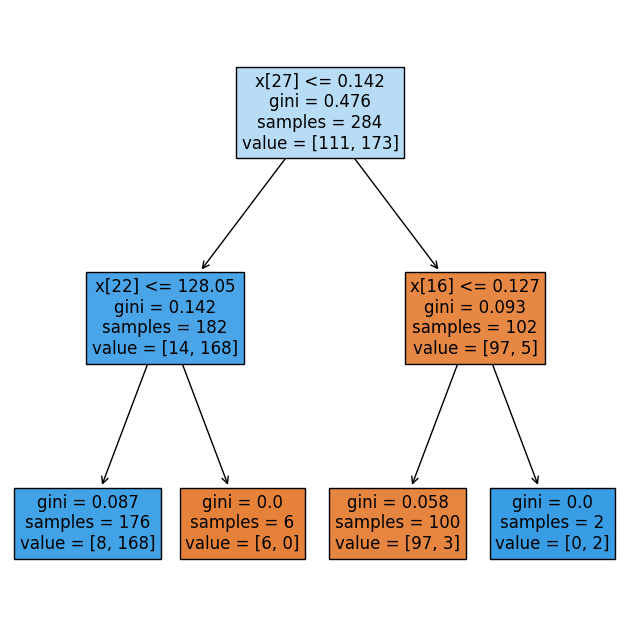

In [7]:
from sklearn.tree import plot_tree

print("Visualize the tree using sklearn.tree.plot tree. Each node of trees should include feature name.")
print("\n")
fig = plt.figure(figsize = (8, 8)) 
g = plot_tree(clf, filled=True, fontsize = 12)


(i) (5 points) Similarly, write a program that generates multiple decision trees using the bagging.




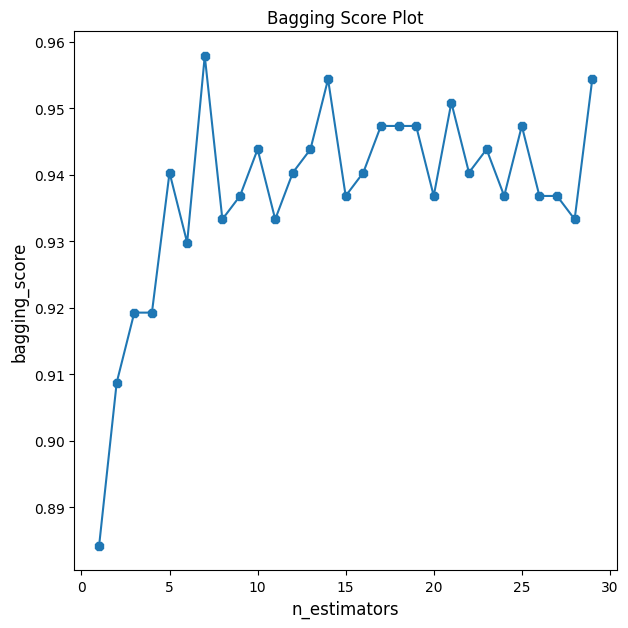

In [8]:
# A program that generates multiple decision trees using
# the bagging. This method should record its prediction accuracy at bagging score
# by varying the parameter n estimators. Draw a 2D line plot whose X-axis is
# n estimators and Y-axis bagging score, and the plot should have more than 20
# data points of different X-axis values.

from sklearn.ensemble import BaggingClassifier

def bagging(X_train, X_test, y_train, y_test, rangeNum):
  baggingScores = []
  n_estimators = []

  # Create n amount of decision tree and calculate their scores
  for i in range(1, rangeNum):
    decisionTrees = BaggingClassifier(n_estimators=i)
    decisionTrees.fit(X_train, y_train)
    n_estimators.append(i)
    y_pred = decisionTrees.predict(X_test)

    # Calculate the accuracy score and add it to the score list 
    baggingScores.append(accuracy_score(y_test, y_pred))

  plt.plot(n_estimators, baggingScores, marker='8')
  plt.title("Bagging Score Plot")
  plt.ylabel("bagging_score", fontsize = 12)
  plt.xlabel("n_estimators", fontsize = 12)


print("(i) (5 points) Similarly, write a program that generates multiple decision trees using the bagging.")
print("\n")
fig = plt.figure(figsize = (7, 7)) 
bagging(X_train, X_test, y_train, y_test, 30)

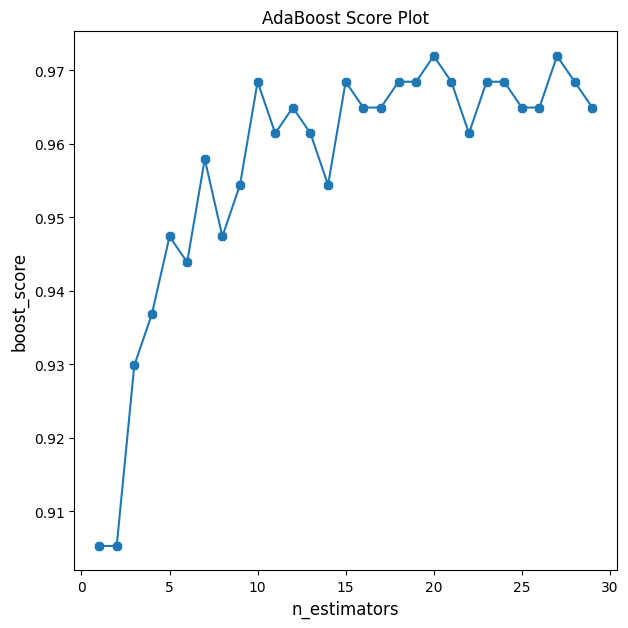

In [9]:
# Write a program that generates multiple decision trees using
# the AdaBoost. Draw a 2D line plot whose X-axis is n estimators and Y-axis
# boost score, and the plot should have more than 20 data points of different X-axis
# values.

from sklearn.ensemble import AdaBoostClassifier


def adaBoost(X_train, X_test, y_train, y_test, rangeNum):
  adaBoostScores = []
  n_estimators = []

  # Create n amount of decision tree and calculate their scores
  for i in range(1, rangeNum):
    decisionTrees = AdaBoostClassifier(n_estimators=i)
    decisionTrees.fit(X_train, y_train)
    n_estimators.append(i)
    y_predict = decisionTrees.predict(X_test)

    # Calculate the accuracy score and add it to the score list 
    adaBoostScores.append(accuracy_score(y_test, y_predict))

  plt.plot(n_estimators, adaBoostScores, marker='8')
  plt.title("AdaBoost Score Plot")
  plt.ylabel("boost_score", fontsize = 12)
  plt.xlabel("n_estimators", fontsize = 12)


fig = plt.figure(figsize = (7, 7))  
adaBoost(X_train, X_test, y_train, y_test, 30)

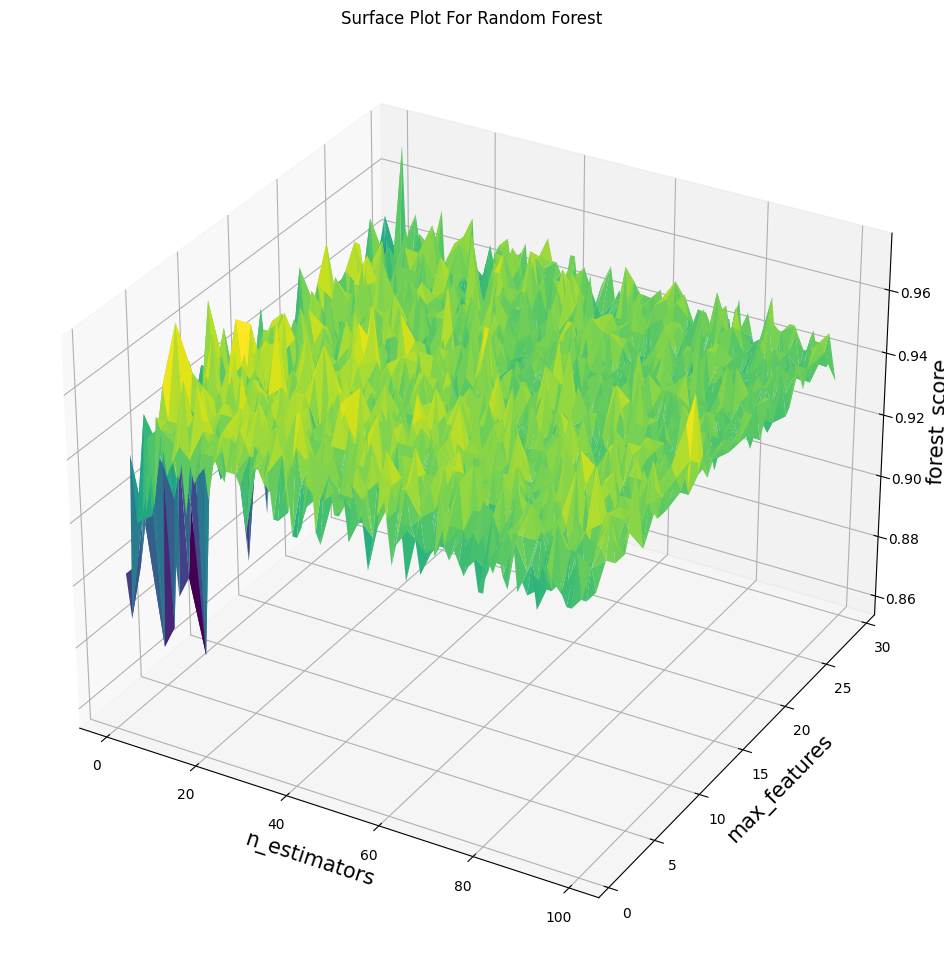

In [10]:
import matplotlib
from sklearn.utils.extmath import randomized_range_finder
# Write a program that generates multiple decision trees using
# the random forest. Draw a 3D surface plot whose X-axis is n estimators, Y-axis
# max features, and Z-axis forest score. The plot should have more than 100 data
# points of different pair of X-axis and Y-axis values.

from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits import mplot3d

def RandomForest(X_train, X_test, y_train, y_test, rangeNum, featureRangeNum):
  randomForrestScore = []
  maxFeatures = []
  n_estimators = []
  
  for i in range(1, rangeNum):
    for j in range(1, featureRangeNum):
      decisionTrees = RandomForestClassifier(n_estimators=i, max_features=j)
      decisionTrees.fit(X_train, y_train)
      n_estimators.append(i)
      maxFeatures.append(j)
      y_predict = decisionTrees.predict(X_test)

      randomForrestScore.append(accuracy_score(y_test, y_predict))
      
  fig = plt.figure(figsize = (12, 12))  

  # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
  # https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

  ax = plt.axes(projection='3d')
  ax.plot_trisurf(n_estimators, maxFeatures, randomForrestScore, cmap = matplotlib.cm.viridis)
  ax.set_title('Surface Plot For Random Forest')
  plt.xlabel("n_estimators", fontsize = 15)
  plt.ylabel("max_features", fontsize = 15)
  ax.set_zlabel("forest_score", fontsize = 15)

RandomForest(X_train, X_test, y_train, y_test, 100, 30)

